In [ ]:
import pandas as pd #подключим pandas
import matplotlib.pyplot as plt #подключим библиотеку для продвинутой работы с графиками

# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости.

Цели проекта: определить рыночную стоимость объектов недвижимости, установить параметры квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

Описание данных: В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

 На основе этих данных определена рыночная стоимость объектов недвижимости разного типа, установлены параметры квартир, в зависимости от удалённости от центра,  

Навыки и инструменты, используемые для реализации данного проекта: Python, pandas, matplotlib, предобработка данных, исследовательский анализ данных, визуализация данных.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
display(data.head(10)) #выведем датафрейм на экран

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

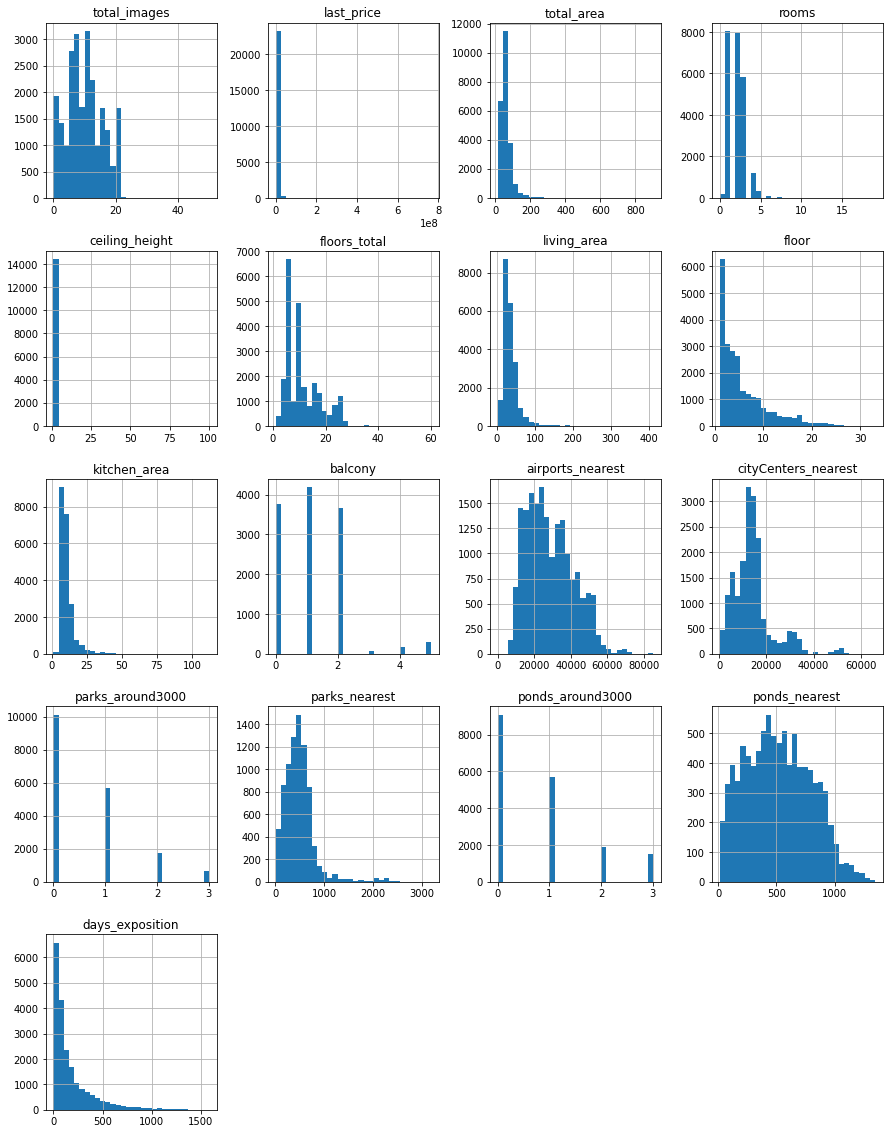

In [2]:
data.hist(figsize = (15, 20), bins = 30) #построим гистограммы для датафрейма и изучим их

На первый взгляд в столбцах видны аномалии, изучим датафрейм более детально. Столбцы, с которыми мы не будем работать, предобрабатывать не будем.

In [3]:
data.info() #выводим и изучаем основную информацию о датафрейме 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

In [4]:
data.isna().sum()#считаем количество пропущенных значений в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Много пропусков в столбцах с высотой потолков, со свойством "апартаменты" и с информацией о наличии балкона/балконов. Эта информация нам не понадобятся, поэтому с пропусками в вышеуказанных столбцах ничего делать не будем.

Все картографические данные (расстояние до центра города, аэропорта и ближайшего парка) по какой-то причине имеют большие количества пропусков. 

Скорее всего, они взаимосвязаны с уникальными значениями locality_name и 
поэтому не помжем заменить эти пропуски медианными значениями по locality_name.

Заменить пропуски в locality_name мы не можем, но так как пропусков всего 49 из 23699, то можно удалить эти строки.

In [6]:
#удалим строки с пропускми locality_name
data = data.dropna(subset=['locality_name'])
print(data.isna().sum()) #проверим произошли ли изменения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64


В floors_total мало пропущенных значений(86) относительно общего числа элементов(23698), поэтому их можно заменить медианным значением:

In [7]:
#заполняем пропущенные значения в floors_total 
mediana_floors = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(mediana_floors)
print(data['floors_total'].isna().sum()) #проверим результат замены

0


In [8]:
data.dtypes #выводим и изучаем типы данных датафрейма

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [9]:
#изменяем типы данных, где нужно
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float') #изменяем тип из-за ошибки в выводе одной из следующих строк кода
data.dtypes #проверяем произошли ли изменения

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

В столбце first_day_exposition был изменен тип данных на тип datetime для дальнейшего удобства работы с датами

In [10]:
display(data.duplicated().sum())#ищем явные дубликаты

0

Ищем неявные дубликаты в столбце locality_name:

In [11]:
display(data['locality_name'].unique())#выводим уникальные значения в столбце с названиями населённых пунктов 
len(data['locality_name'].unique())#считаем количество уникальных значений для дальнейшего сравнения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

364

Избавляемся от неявных дубликатов в столбце locality_name 

In [12]:
#удаляем все слова, кроме наименований населённых пунктов, для удаления неявных дубликатов
data['locality_name']=data['locality_name'].str.replace("поселок |посёлок |имени |деревня |городского типа |садоводческое некоммерческое товарищество |село", '')
data['locality_name']=data['locality_name'].str.replace("^ |городской |коттеджный |станции |", '')
#снова выводим список уникальных значений и сортируем в алфавитном порядке для удобства проверки
display(data['locality_name'].sort_values().unique())
#считаем количество уникальных значений, чтобы проверить произошли ли измененя
#и сравниваем с количеством уникальных значений в "сырых данных"
len(data['locality_name'].unique())

/tmp/ipykernel_137/57256696.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['locality_name']=data['locality_name'].str.replace("поселок |посёлок |имени |деревня |городского типа |садоводческое некоммерческое товарищество |село", '')
/tmp/ipykernel_137/57256696.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['locality_name']=data['locality_name'].str.replace("^ |городской |коттеджный |станции |", '')


array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

309

In [13]:
#поверхностно ищем аномалии в столбцах, оценивая медианное значение каждого столбца, с которыми мы будем работать
print(data.median())

total_images                 9.00
last_price             4650000.00
total_area                  52.00
rooms                        2.00
ceiling_height               2.65
floors_total                 9.00
living_area                 30.00
floor                        4.00
is_apartment                 0.00
studio                       0.00
open_plan                    0.00
kitchen_area                 9.10
balcony                      1.00
airports_nearest         26756.50
cityCenters_nearest      13105.00
parks_around3000             0.00
parks_nearest              454.50
ponds_around3000             1.00
ponds_nearest              502.00
days_exposition             95.00
dtype: float64


/tmp/ipykernel_137/89477217.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data.median())


Все значения выглядят адекватно. Однако, с некоторыми значениями трудно работать, потому что они большие. 
Например, столбцы airports_nearest и cityCenters_nearest можно перевести из метров в километры:

In [14]:
#переведём расстояние cityCenters_nearest_km в км и округлим до целых значений
data['cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000)
#переведём расстояние airports_nearest в км и округлим до целых значений
data['airports_nearest'] = round(data['airports_nearest'] / 1000)
print(data.median())#проверим, произошли ли изменения

/tmp/ipykernel_137/3231022458.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(data.median())#проверим, произошли ли изменения


total_images                 9.00
last_price             4650000.00
total_area                  52.00
rooms                        2.00
ceiling_height               2.65
floors_total                 9.00
living_area                 30.00
floor                        4.00
is_apartment                 0.00
studio                       0.00
open_plan                    0.00
kitchen_area                 9.10
balcony                      1.00
airports_nearest            27.00
cityCenters_nearest         13.00
parks_around3000             0.00
parks_nearest              454.50
ponds_around3000             1.00
ponds_nearest              502.00
days_exposition             95.00
dtype: float64


Проверим характеристики каждого столбца в датафрейме:

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,14490.000000,23650.000000,21752.000000,23650.000000,21381.000000,12137.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.771287,10.669852,34.448356,5.893277,10.566403,1.153003,28.809229,14.191576,0.611577,490.830729,0.769680,518.059879,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,1.261593,6.583725,22.037664,4.883317,5.901753,1.071169,12.639962,8.614645,0.802003,342.554386,0.937948,277.841733,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,19.000000,9.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,27.000000,13.000000,0.000000,454.500000,1.000000,502.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37.000000,16.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,85.000000,66.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Столбец с ценами last_price важен для исследования, прверим его на аномалии более детально:

In [16]:
data['last_price']=data['last_price']/1000000 #поделим last_price на миллион для удобства оценки характеристик
print(data['last_price'].describe()) #получим характеристики столбца

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64


Стандартное значение почти в два раза больше среднего, это может говорить о вбросах.
Постараемся от них избавиться:

<AxesSubplot:>

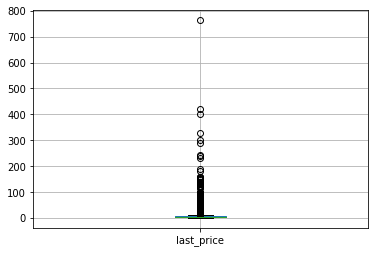

In [17]:
data.boxplot(['last_price']) #построим диаграмму размаха по столбцу last_price

(0.0, 20.0)

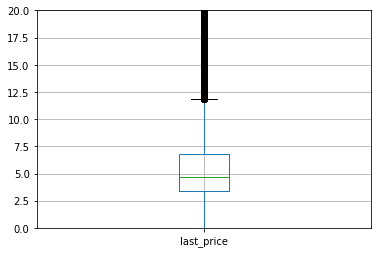

In [18]:
data.boxplot(['last_price'])
plt.ylim(0, 20)

In [19]:
price_97_quantile=data['last_price'].quantile(0.97) #смотрим 97ой персентиль 
print(price_97_quantile)

20.0


Так как количество жилья стоимостью больше 20 миллиона составляют 3% датасета,  можно удалить строки в которых значение столбца last_price больше 20:

In [20]:
data.drop(data[data.last_price > price_97_quantile].index, inplace=True) #удаляем 'вбросы'
print(data.last_price.count()) #проверим изменения в количестве строк

22944


Минимальная цена слишком маленькая, рассмотрим детальнее

In [21]:
print(data['last_price'].sort_values().head(20)) #сортируем столбец в порядке возрастания

8793     0.01219
14911    0.43000
17456    0.43000
16274    0.44000
5698     0.45000
9581     0.45000
17676    0.45000
16219    0.45000
18867    0.47000
21912    0.47000
23484    0.47000
16032    0.48000
10782    0.49000
6859     0.49000
14904    0.50000
14295    0.50000
2097     0.50000
4405     0.50000
22430    0.52000
12607    0.53000
Name: last_price, dtype: float64


Неправдободно маленькое значение с ценой в 12000 всего 1, поэтому можно удалить эту строку.

In [22]:
data.drop(data[data.last_price < 0.013].index, inplace=True) #удаляем строку с явно выбивающимся значением в столбце last_price
print(data.last_price.count())

22943


count    22943.000000
mean         5.421830
std          3.218587
min          0.430000
25%          3.400000
50%          4.550000
75%          6.500000
max         20.000000
Name: last_price, dtype: float64


<AxesSubplot:>

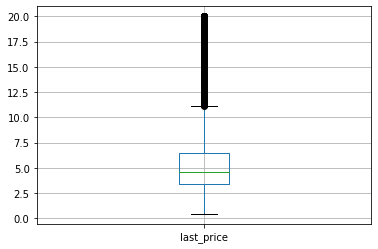

In [23]:
#снова получим характеристики столбца и построим диаграмму размаха, чтобы проверить, произошли ли изменения
print(data['last_price'].describe())
data.boxplot(['last_price'])

Столбец days_exposition тоже важен для исследования, теперь проверим его на выбросы и по-возможности избавимся от них:

<AxesSubplot:>

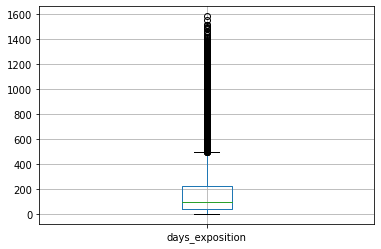

In [24]:
data.boxplot(['days_exposition'])

Проверим сколько всего строк в столбце days_exposition:

In [25]:
print(data.days_exposition.count())

19960


In [26]:
days_exposition_98_quantile = data['days_exposition'].quantile(0.98) 
print(days_exposition_98_quantile)#смотрим 98й пресентиль

888.0


Число объявлений, висящих более 888 дней, составляет 2% от датасета. 

Учитывая, что выше было удалено 3% строк, можно удалить ещё 888 строк, т.е. ещё 2%. На результат исследования это не повлияет. 

In [27]:
data.drop(data[data.days_exposition > days_exposition_98_quantile].index, inplace=True) #удаляем 'вбросы'
print(data.days_exposition.count())#проверим изменения в количестве строк

19562


In [28]:
data.isna().sum() #ещё раз проверим количество пропусков в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           8798
floors_total                0
living_area              1774
floor                       0
is_apartment            19925
studio                      0
open_plan                   0
kitchen_area             2164
balcony                 10877
locality_name               0
airports_nearest         5438
cityCenters_nearest      5421
parks_around3000         5420
parks_nearest           15137
ponds_around3000         5420
ponds_nearest           14166
days_exposition          2983
dtype: int64

Посмотрим среднерыночную цену жилья в Петербурге и умножим на миллион, чтоб посмотреть цену в миллионах:

In [29]:
data.loc[data['locality_name'] == "Санкт-Петербург"]['last_price'].median()*1000000

5350000.0

Посмотрим среднерыночную цену в Ленинградской области, также в миллионах:

In [30]:
data.query('locality_name != "Санкт-Петербург"')['last_price'].median()*1000000

3150000.0

Теперь построим матрицу корреляций для всех столбцов датафрейма после предобработки данных (пригодится в процессе выполнения следующих заданий):

In [31]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.160753,0.106609,0.086872,-0.007741,0.018852,0.090935,0.034429,-0.029323,-0.023496,0.084587,0.124946,-0.001713,-0.035820,0.008821,-0.002950,-0.019097,-0.000451,-0.016528
last_price,0.160753,1.000000,0.770534,0.513864,0.103783,0.112758,0.667326,0.093009,-0.058630,-0.039525,0.574995,0.122761,-0.036141,-0.353770,0.164203,0.053588,0.177824,-0.098077,0.098731
total_area,0.106609,0.770534,1.000000,0.797229,0.072934,-0.050408,0.927670,-0.031652,-0.094476,-0.057948,0.529320,0.083664,-0.024357,-0.193934,0.111392,0.006888,0.126708,-0.059580,0.126882
rooms,0.086872,0.513864,0.797229,1.000000,0.032831,-0.226400,0.876917,-0.162988,-0.158973,-0.096993,0.164492,0.025855,-0.053960,-0.139650,0.095539,-0.040729,0.058707,-0.029816,0.101305
ceiling_height,-0.007741,0.103783,0.072934,0.032831,1.000000,-0.022156,0.066876,-0.009240,0.002764,0.043462,0.069524,0.044780,-0.020557,-0.078072,0.052357,-0.015296,0.071305,-0.055578,0.010625
floors_total,0.018852,0.112758,-0.050408,-0.226400,-0.022156,1.000000,-0.172708,0.673020,0.068935,0.052519,0.246053,0.196796,0.108343,0.001969,-0.242113,0.096075,-0.116785,0.041242,-0.053929
living_area,0.090935,0.667326,0.927670,0.876917,0.066876,-0.172708,1.000000,-0.118301,-0.065412,-0.038998,0.295310,0.040410,-0.054921,-0.189701,0.131594,-0.033302,0.108711,-0.044612,0.120195
floor,0.034429,0.093009,-0.031652,-0.162988,-0.009240,0.673020,-0.118301,1.000000,0.036515,0.037234,0.178393,0.166886,0.073821,0.003454,-0.159369,0.075115,-0.076380,0.030055,-0.038884
studio,-0.029323,-0.058630,-0.094476,-0.158973,0.002764,0.068935,-0.065412,0.036515,1.000000,-0.004356,NaN,0.032085,-0.021703,-0.010858,-0.029042,0.009519,0.004232,0.000457,-0.024340
open_plan,-0.023496,-0.039525,-0.057948,-0.096993,0.043462,0.052519,-0.038998,0.037234,-0.004356,1.000000,NaN,0.021625,-0.014012,-0.003522,-0.012374,0.011524,0.007289,-0.003169,-0.023550


Посчитаем цены за 1 кв. метр и добавим в таблицу новые столбцы.

In [32]:
#столбец с ценами за 1 кв метр
data['last_price']=data['last_price']*1000000 #переведем столбец обратно в миллионы
data['price_one_metr'] = data['last_price']/data['total_area'] #cчитаем цену за 1 кв м для каждого объявления
display(data['price_one_metr'].head(10))#цена одного квадратного метра;


0     120370.370370
1      82920.792079
2      92785.714286
4     100000.000000
5      95065.789474
6      99195.710456
7     110544.692737
8      87454.764777
9      88524.590164
10    127525.252525
Name: price_one_metr, dtype: float64

In [33]:
#день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
data['day_first_day_exposition'] = data['first_day_exposition'].dt.weekday #создаём столбец с днём публикации
print(data['day_first_day_exposition'].head(10))

0     3
1     1
2     3
4     1
5     0
6     3
7     3
8     2
9     6
10    3
Name: day_first_day_exposition, dtype: int64


In [34]:
#месяц публикации объявления
data['month_first_day_exposition_day'] = data['first_day_exposition'].dt.month #создаём столбец с месяцем публикации
print(data['month_first_day_exposition_day'].head(10))

0      3
1     12
2      8
4      6
5      9
6     11
7      4
8      5
9      2
10    11
Name: month_first_day_exposition_day, dtype: int64


In [35]:
#год публикации объявления
data['year_first_day_exposition'] = data['first_day_exposition'].dt.year #создаём столбец с годом публикации
print(data['year_first_day_exposition'].head(10))

0     2019
1     2018
2     2015
4     2018
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
Name: year_first_day_exposition, dtype: int64


In [36]:
#распределим типы этажей квартир (на «первый», «последний», «другой»)
def categorize_income(income_row): #создаём функцию, чтобы разбить типы этажей на 3 категории
    if income_row['floor'] == 1:
        category='Первый'
    elif income_row['floor'] == income_row['floors_total']:
        category = 'Последний'
    else:
        category = 'Другой'
    return category
#передаём функцию categorize_income функции apply и создаём новый столбец в датафрейме
data['floors_type']=data.apply(categorize_income,axis=1) 
print(data['floors_type'].head(10))

0     Другой
1     Первый
2     Другой
4     Другой
5     Другой
6     Другой
7     Другой
8     Другой
9     Другой
10    Другой
Name: floors_type, dtype: object


In [38]:
print(data.query('living_area > 150')['locality_name'].count())

21


In [39]:
#удалим объявления жилья, жилой площадью больше 150, так как таких объявлений очень мало
data = data[data['living_area'] <= 150]

<AxesSubplot:>

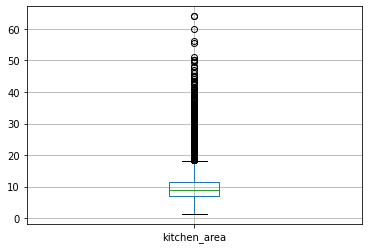

In [40]:
data.boxplot(['kitchen_area'])

In [41]:
print(data.query('kitchen_area > 50')['kitchen_area'].count())

7


In [42]:
data = data[data['kitchen_area'] <= 50]

<AxesSubplot:>

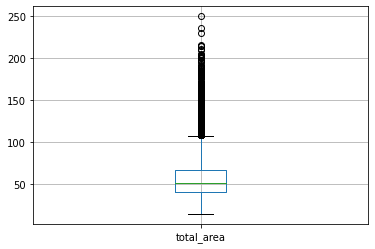

In [43]:
data.boxplot(['total_area'])

In [44]:
print(data.query('total_area > 180')['locality_name'].count())

41


In [45]:
data = data[data['total_area'] <= 180]

<AxesSubplot:>

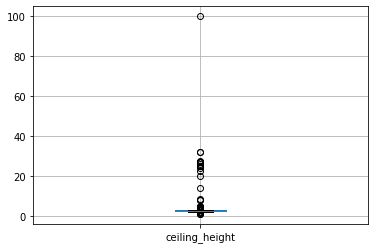

In [46]:
data.boxplot(['ceiling_height'])

47


<AxesSubplot:ylabel='Frequency'>

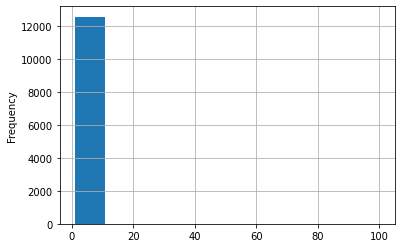

In [47]:
print(data.query('ceiling_height>4')['ceiling_height'].count()) #считаем количесвто жилья с аномально высокими потолками (больше 4 метров)

data.ceiling_height.plot(kind = 'hist',grid = True)

In [48]:
data = data[data['ceiling_height'] < 4] #удаляем объявления жилья с аномальными потолкам

Так как жилья с потолками больше 4 метров очень мало, но эти значения влияют на дальнейшее исследование, мы их удалим, у основной  массы жилья потолки от 2.5 до 3.5 метров.

### Исследовательский анализ данных.

In [49]:
data['days_exposition'].quantile(0.98)

715.0000000000001

In [50]:
data.days_exposition.describe()
data.days_exposition.median()

101.0

45.0    254
60.0    197
30.0    141
7.0     134
4.0     100
3.0      88
8.0      82
14.0     80
5.0      79
28.0     79
18.0     76
9.0      73
90.0     71
6.0      71
11.0     70
29.0     70
20.0     69
22.0     66
10.0     66
24.0     64
Name: days_exposition, dtype: int64


<AxesSubplot:>

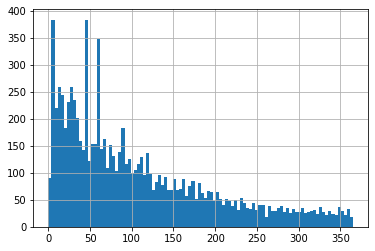

In [51]:
#Изучим, как быстро продавались квартиры. Этот параметр показывает, сколько дней «висело» каждое объявление.
print(data[data['days_exposition'] < 100]['days_exposition'].sort_values().value_counts().head(20))
data['days_exposition'].hist(bins = 100, range = (0, 365))

Большинство квартир продавалось на 45й и 60й дни с момента размещения объявления.(Подозрительно резко выбивающиеся значения, возможно, это связано с окончанием беспланого размещения и в определённые дни объявления снимались с публикации не по причине продажи квртир. Поэтому будем ориентироваться на плавно нисходящие столбцы.

В 1ый и 2ой день размещения объявления на сайте квартиры практически не продаются.

Основное количество продаж приходится на первые 90 дней размещения объявлений.

Примерно после 100 дней нахождения объявления на сайте, квартиры продаются всё меньше и меньше.

In [ ]:
#считаем медиану количества дней размещения объяление для каждого населённого пункта 
median_days_exposition = data.groupby('locality_name')['days_exposition'].median()

<AxesSubplot:ylabel='Frequency'>

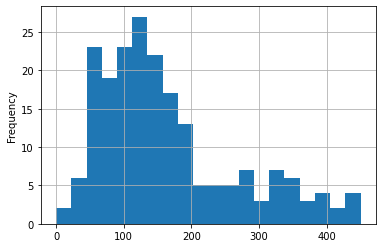

In [53]:
median_days_exposition.plot(kind='hist', bins=20, range = (0, 450), grid = True)

Так как по графику определить сложно из-за большого количества населённых пунктов, да и смысла особого нет, посчитаем медиану и для всех объявлений:

In [54]:
print(median_days_exposition.median())

139.5


В среднем квартиры продаются за 139 дней

In [56]:
#Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта.
corr_total_area = data['last_price'].corr(data['total_area'])
corr_living_area = data['last_price'].corr(data['living_area'])
corr_kitchen_area = data['last_price'].corr(data['kitchen_area'])
corr_rooms = data['last_price'].corr(data['rooms'])
corr_year_first_day_exposition = data['last_price'].corr(data['year_first_day_exposition'])

print('корреляция между общей площадью жилья и ценой:', corr_total_area)
print('корреляция между жилой площадью и ценой:', corr_living_area)
print('корреляция между площадью кухни и ценой:', corr_kitchen_area)
print('корреляция между количеством комнат и ценой:', corr_rooms)
print('корреляция между годом размещения объявлений и ценой:', corr_year_first_day_exposition)

корреляция между общей площадью жилья и ценой: 0.7802334579010856
корреляция между жилой площадью и ценой: 0.6601064549633904
корреляция между площадью кухни и ценой: 0.5820646243255163
корреляция между количеством комнат и ценой: 0.5045684075058392
корреляция между годом размещения объявлений и ценой: -0.009611362208601327


Корреляция между общей площадью жилья и ценой составляет 0.77, это говорит о сильной взаимосвязи показателей (положительная corr), то есть цена сильно зависит от площади жилья: чем больше площадь, тем выше цена.

Корреляция между жилой площадью и ценой немного ниже (0.66), это также говорит о тесной связи показателей (положительная corr), то есть цена также сильно зависит от жилой площади квартиры.

Корреляция между площадью кухни и ценой равна 0.57 Это говорит о средней взаимосвязи (тоже положительная corr), размер кухни также влияет на цену, однако не так сильно, как общая и жилая площадь жилья.

Корреляция между количеством комнат и ценой 0.5, то есть взаимосвязь показателей средняя (снова положительная corr). Чем больше комнат в квартире, тем выше цена.

А корреляция между годом размещения объявлений и ценой практически отсутствует (отрицвтельная corr.)

In [57]:
#поделим значения last_pric на миллион для удобства работы с графиками
data['last_price'] = data['last_price']/1000000
print(data['last_price'].head(10))

0     13.00
4     10.00
9      5.40
10     5.05
13     3.55
16     6.70
18     3.25
19    14.20
20     6.12
22     5.00
Name: last_price, dtype: float64


Построим графики для каждого значения:

<AxesSubplot:title={'center':'corr_year_first_day_exposition'}, xlabel='year_first_day_exposition', ylabel='last_price'>

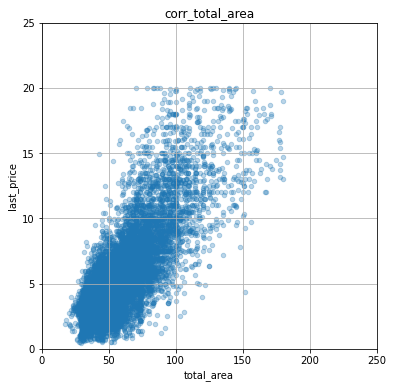

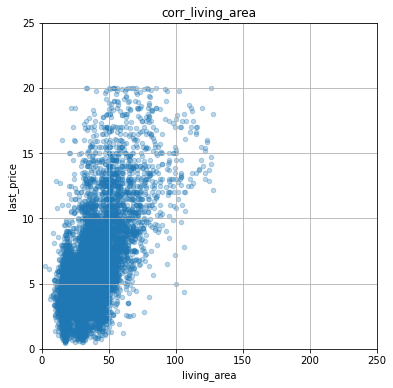

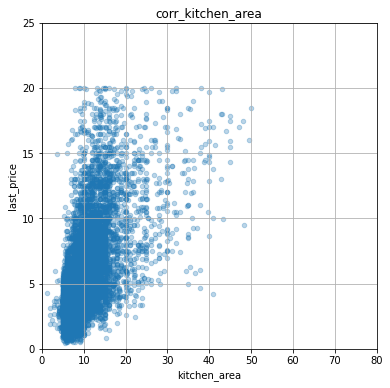

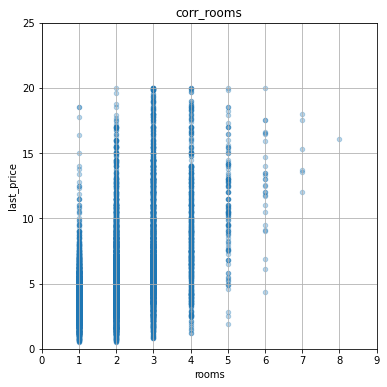

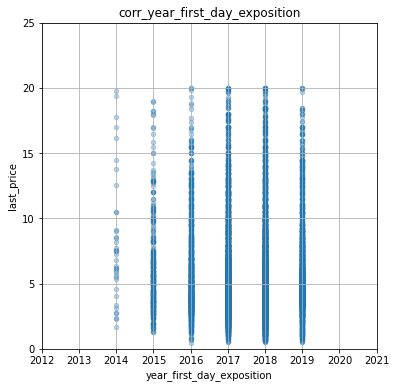

In [58]:
data.plot(x ='total_area', y = 'last_price', xlim = (0, 250), ylim = (0, 25), figsize = (6,6), alpha = 0.3, kind ='scatter',grid=True, title = 'corr_total_area')
data.plot(x ='living_area', y = 'last_price', xlim = (0, 250), ylim = (0,25), figsize = (6,6), alpha = 0.3 , kind ='scatter', grid=True, title = 'corr_living_area')
data.plot(x ='kitchen_area', y = 'last_price', xlim = (0, 80), ylim = (0,25), figsize = (6,6), alpha = 0.3 , kind ='scatter', grid=True, title = 'corr_kitchen_area')
data.plot(x ='rooms', y = 'last_price', xlim = (0, 9), ylim = (0, 25),  figsize = (6,6), alpha = 0.3, kind ='scatter', grid=True, title = 'corr_rooms')
data.plot(x ='year_first_day_exposition', y = 'last_price',  xlim = (2012, 2021), ylim = (0,25), figsize = (6,6), alpha = 0.3,kind ='scatter',grid=True, title = 'corr_year_first_day_exposition')

<AxesSubplot:xlabel='year_first_day_exposition'>

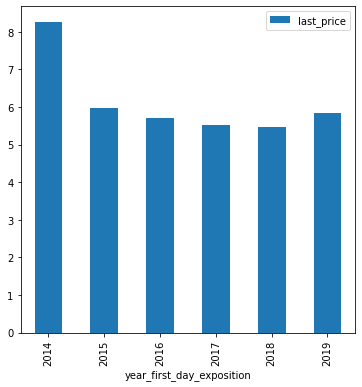

In [62]:
(data.groupby('year_first_day_exposition')
     .agg({'last_price': 'mean'})
     .reset_index()
     .plot(x ='year_first_day_exposition', kind='bar', y = 'last_price', figsize = (6,6)))

Изучив грфики, можно сказать следующее:

1)Чем больше общая площадь жилья, тем выше цена,  Больше всего квартир с площадью от 20 до 100 кв м.

2)Больше всего квартир с жилой площадью от 10 до 60 кв м. Квартиры с одинаковой жилой площадью могут сильно разниться в цене, однако наблюдается тенденция к росту цены с увеличением жилой площади.

3)Большинство кухонь имеют площадь от 5 до 20 м. Площадь кухни не сильно коррелирует с ценой, однако взаимосвязь есть: например, цены жилья с кухней площадью в 5м начинается от 450 тысяч, а вот с кухней в 10 квадратов дешевле 2 миллионов квартиру не найти.


4)Дешевле всего жильё без комнат (студии) и однушек (большиство стоят до 10 миллионов). Двух- и трёхкомнатные квартиры ещё можно найти дешевле миллиона. А вот жильё начиная от 4х комнат стоит больше миллиона.  

В целом, цены с каждым количеством комнат имеют очень большой диапазон, это говорит о том, что количество комнат и цена слабо взаимосвязаны.
Больше всего покупалось квартир с 3мя комнатами. Наиболее популярны квартиры с количеством комнат от 0(студии) до 5. А популярность квартир с количеством комнат от 6 и более минимальна, прослеживается такая взаимосвязь: чем больше количество комнат, тем меньше таких квартир размещено на сайте.

5)Явно в 2014 году по какой-то причине было продано мало жилья за период. В 2015 количество покупок увеличилось. Больше всего жилья было продано в 2018 и 2019 годах. 

In [63]:
#Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
#Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
df = data['locality_name'].value_counts().sort_values(ascending=False) #считаем уникальные значени locality_name и сортируем его
top_10_localities = df[0:10] #делаем срез из 10 населённых пунктов с наибольшим числом объявлений

average_price = pd.DataFrame(columns = ['average_price_per_meter'], index=top_10_localities.index) 
#создаём датафрейм со столбцом цен за квадратный метр для дальнейшей работы

for current_locality in top_10_localities.index: #создаём фунгкцию для расчёта средних цен одного квадратного метра в top_10_localities
    price = data[data['locality_name']== current_locality]['price_one_metr'].mean()
    average_price.loc[[current_locality],'average_price_per_meter'] = price
display(average_price) #проверим результат работы функции

display(average_price[average_price['average_price_per_meter'] == average_price['average_price_per_meter'].min()])
display(average_price[average_price['average_price_per_meter'] == average_price['average_price_per_meter'].max()])

,average_price_per_meter
Санкт-Петербург,108909.69087
Всеволожск,67576.186816
Пушкин,101997.356516
Шушары,79528.59853
Мурино,87497.559682
Колпино,75563.462963
Кудрово,96201.898946
Петергоф,83546.755778
Гатчина,70209.760132
Парголово,91273.250996


,average_price_per_meter
Всеволожск,67576.186816


,average_price_per_meter
Санкт-Петербург,108909.69087


Дешевле всего (58142 тыс. руб.) квадратный метр жилья стоит в Выборге, а дороже всего (108690 тыс. руб.) в Санкт-Петербурге

<AxesSubplot:xlabel='cityCenters_nearest'>

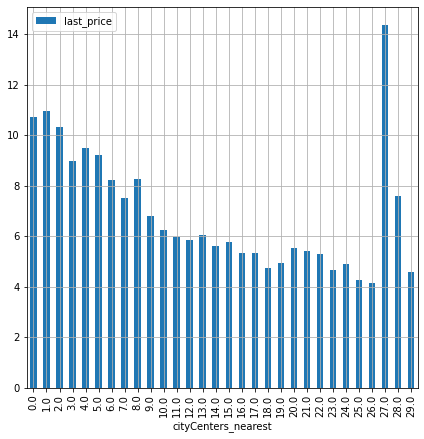

In [64]:
#выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. 
#посмотрим, как стоимость объектов зависит от расстояния до центра города.

spb = data.query('locality_name == "Санкт-Петербург"')#сдлаем срез, выделим строки со значением Санкт-Петербург в столбце locality_name
spb_km_center = spb.pivot_table(index = 'cityCenters_nearest', values = 'last_price') #получим среднюю цену на каждом километре по удалённости от центра

spb_km_center.plot(kind = 'bar', figsize = (7,7), grid = True) #для наглядности строим столбчатую диаграмму 

Судя по графику дороже всего квартиры прямо в центре города, а также в 1ом и 2 ом километре от центра Санкт-Петербурга.

От 3 километров от центра цены начинают падать.

Жильё, расположенное в 3-8 километрах от центра стоит примерно на одном уровне.

После 9 километров цены примерно на одном уровне, однако есть тенденция к уменьшению цен.

Однозначно можно сказать: чем ближе квартира к центру, тем она дорожа. 

Однако, бросаются в глаза высокие цены жилья по удалённости от центра в 27км, попробуем установить причину:

In [65]:
print(data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].value_counts())

print(data[(data['cityCenters_nearest'] == 27) & (data['locality_name'] == 'Санкт-Петербург')]['last_price'].sort_values())

15.0    948
12.0    941
13.0    870
14.0    783
16.0    738
11.0    672
17.0    493
10.0    419
5.0     409
9.0     341
4.0     339
8.0     320
6.0     254
7.0     194
3.0     189
2.0     154
18.0    122
1.0      95
22.0     92
19.0     91
21.0     56
23.0     51
20.0     22
26.0     15
25.0      8
0.0       8
24.0      4
29.0      3
28.0      1
27.0      1
Name: cityCenters_nearest, dtype: int64
748    14.35
Name: last_price, dtype: float64


На 27ом километре всего 2 квартиры и одна из них стоит 14 миллионов, по этой причине и выбивается столбец. 

### Общий вывод

В ходе исследования были изучены данные с сайта продаж жилья за 2014-2019гг, была совершена предобработка данных, а также проведён исследовательский анализ данных.

В результате проделанной работы были сделаны следующие выводы:

1) Среднерыночная цена жилья в Санкт-Петербурге равна 5 350 000 рублей.

2) Среднерыночная цена в Ленинградской области 3 150 000 рублей.

3) Цены за квадратный метр в 10 наиболее крупных населённых пунктах Санкт-Петербурга и Ленинградской области распределились следующим образом:

Санкт-Петербург	108 659 р.

Пушкин	101 821 р.

Кудрово	95 407 р.

Парголово 90 145 р.

Мурино	86 235 р.

Шушары	78 616 р.

Колпино	75 263 р.

Гатчина	68 997 р.

Всеволожск	67 234 р.

Выборг	58 250 р.

4) Основное количество продаж приходится на первые 90 дней размещения объявлений. В среднем квартиры продаются в течение 104 дней.

5) Была выявлена взаимосвязь между площадью жилья (общая, жилая и площадь кухни) и ценой. Чем больше площадь, тем выше цена. Особенно, эта закономерность прослеживается в Санкт-Петербурге.

Количество комнат также вляет на цену. В большинстве случаев, чем больше количество комнат, тем выше цена.

Удалённость от города тоже сильно влияет на цену. Чем ближе жильё к центру Санкт-Петербурга, тем оно дороже.